###  전국 시도별 화재 발생 현황 
- 전국 2010-2021년까지 시도별 화재 발생 건수
- 전국 평균과 시도별 비교 전국 평균을 line으로 그리고 시도별 평균으로 막대그래프
- 재산 피해액의 동산, 부동산 비율 pie

- 소방청-> 국가화재정보시스템
    - url = https://nfds.go.kr/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMKMRHD.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont]+current_font_list

In [ ]:
# def df_check(df):
#     for e in df:
#         print('********')
#         print(e ,df[e].dtype, df[e].hasnans)
#         print(df[e].unique())
        
# pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-','0').astype(np.int64)

# pd_data['사망_1명당_건수'] = pd_data['건수 (건)'] / pd_data['사망 (명)']

In [2]:
fire_officer_data = pd.read_csv('소방공무원_시도별_2010-2021.csv', encoding='cp949')
fire_accident_data = pd.read_csv('시도별_화재발생_현황_총괄__2010-2021.csv', encoding='cp949')

fire_accident_data['사망 (명)'] = fire_accident_data['사망 (명)'].replace('-','0').astype(np.int64)

fire_accident_data['사망_1명당_건수'] = fire_accident_data['건수 (건)'] / fire_accident_data['사망 (명)']
fire_accident_data['사상자수'] = fire_accident_data['사망 (명)'] + fire_accident_data['부상 (명)']


filter1 = fire_officer_data['행정구역별'] != '전국'
fire_officer_data_f = fire_officer_data[filter1]

filter1 = fire_accident_data['행정구역별'] != '전국'
fire_accident_data_f = fire_accident_data[filter1]

In [6]:
print(fire_officer_data_f.head())
# print(fire_officer_data_f.dtypes)
# print(fire_officer_data_f.shape)

print(fire_accident_data_f.head())
# print(fire_accident_data_f.dtypes)
# print(fire_accident_data_f.shape)


    행정구역별    시점  소방공무원 1인당 담당주민수<br>(A÷B)  주민등록인구<br>(A)  소방공무원 수<br>(B)
12  서울특별시  2010                    1778.0       10312545            5800
13  서울특별시  2011                    1694.0       10249679            6051
14  서울특별시  2012                    1603.0       10195318            6359
15  서울특별시  2013                    1560.0       10143645            6501
16  서울특별시  2014                    1514.0       10103233            6674
    행정구역별    시점  건수 (건)  사망 (명)  부상 (명)  재산피해(계) (천원)  부동산 (천원)   동산 (천원)  \
12  서울특별시  2010    5321      42     188      14503873   5948963   8554910   
13  서울특별시  2011    5526      29     168      14185528   5887081   8298447   
14  서울특별시  2012    5724      31     246      17382374   6132231  11250143   
15  서울특별시  2013    5646      31     202      21495228   6814090  14681138   
16  서울특별시  2014    5815      36     265      20052979   6674887  13378092   

    이재가구수 (가구)  이재민수 (명)  
12         131       277  
13         158       312  
14         131    

In [3]:
# fire_accident_data_f
frames = [fire_officer_data_f.set_index(['행정구역별', '시점']), fire_accident_data_f.set_index(['행정구역별', '시점'])]

df1 = pd.concat(frames, axis=1, join='outer')
df2 = df1.reset_index()
df2['주민수당_사건수'] = df2['건수 (건)'] / df2['주민등록인구<br>(A)'] *10000
df2

,행정구역별,시점,소방공무원 1인당 담당주민수<br>(A÷B),주민등록인구<br>(A),소방공무원 수<br>(B),건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명),사망_1명당_건수,사상자수,주민수당_사건수
0,서울특별시,2010,1778.0,10312545,5800,5321,42,188,14503873,5948963,8554910,131,277,126.690476,230,5.159735
1,서울특별시,2011,1694.0,10249679,6051,5526,29,168,14185528,5887081,8298447,158,312,190.551724,197,5.391388
2,서울특별시,2012,1603.0,10195318,6359,5724,31,246,17382374,6132231,11250143,131,260,184.645161,277,5.614342
3,서울특별시,2013,1560.0,10143645,6501,5646,31,202,21495228,6814090,14681138,58,153,182.129032,233,5.566047
4,서울특별시,2014,1514.0,10103233,6674,5815,36,265,20052979,6674887,13378092,161,369,161.527778,301,5.755583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,제주특별자치도,2017,804.0,657083,817,751,5,19,3944602,2022493,1922109,9,15,150.200000,24,11.429302
198,제주특별자치도,2018,815.0,667191,819,636,4,23,3956895,1199603,2757292,5,8,159.000000,27,9.532503
199,제주특별자치도,2019,678.0,670989,989,607,3,33,2998401,1088297,1910104,6,15,202.333333,36,9.046348
200,제주특별자치도,2020,628.0,674635,1075,515,12,14,4905209,1964304,2940905,8,15,42.916667,26,7.633758


### 소방공무원 수 와 사건 (건), 사망 (명)

In [4]:
for i, e in enumerate(df2['행정구역별'].unique()):
    print(i,e)

0 서울특별시
1 부산광역시
2 대구광역시
3 인천광역시
4 광주광역시
5 대전광역시
6 울산광역시
7 세종특별자치시
8 경기도
9 강원도
10 충청북도
11 충청남도
12 전라북도
13 전라남도
14 경상북도
15 경상남도
16 제주특별자치도


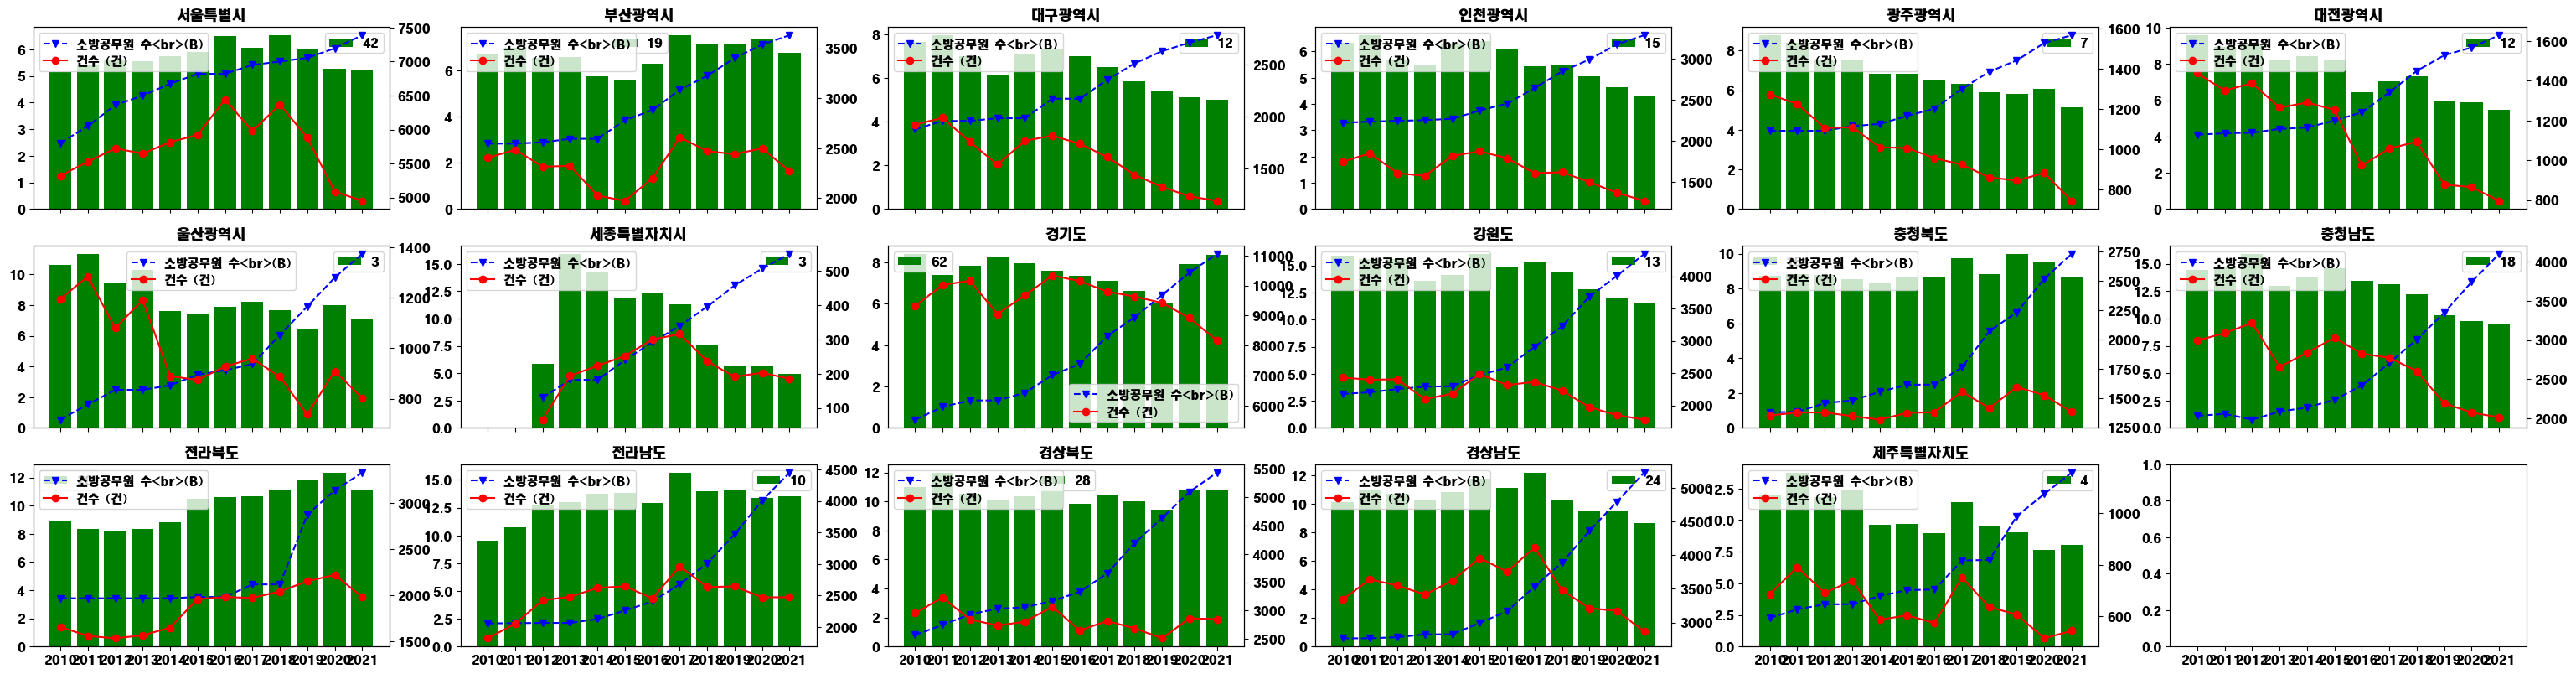

In [5]:
# df1.plot.bar(x='행정구역별', y='사망 (명)', rot = 0)
fig, axes = plt.subplots(3,6, figsize=(6.4*6,4.8*2), sharey=False, sharex=True)
col_name = df2.columns
for i, e in enumerate(df2['행정구역별'].unique()):
    filter1 = df2['행정구역별'] == e
    ax = axes[i//6, i%6]
    xs = df2.loc[filter1,'시점']
    ys = df2.loc[filter1,col_name]
    ax.set_title(e)
#     ax.plot(xs.astype('str'),ys.iloc[:,0] , 'go--')
    ax.bar(xs.astype('str'),ys.iloc[:,-1],color='green')   # 사망 
    ax.legend(ys['사망 (명)'])
#     ax.bar(xs.astype('str'),ys.iloc[:,7],color='orange')  # 부상 
    ax2 = ax.twinx()
    ax2.plot(xs.astype('str'),ys.iloc[:,4] , 'bv--')  # 소방공무원수
    ax2.plot(xs.astype('str'),ys.iloc[:,5] , 'ro-')   # 사건수
    ax2.legend(ys.iloc[:,4:6])
    

### 시도별 재산피해액이 언제 가장 많이 있었는지.

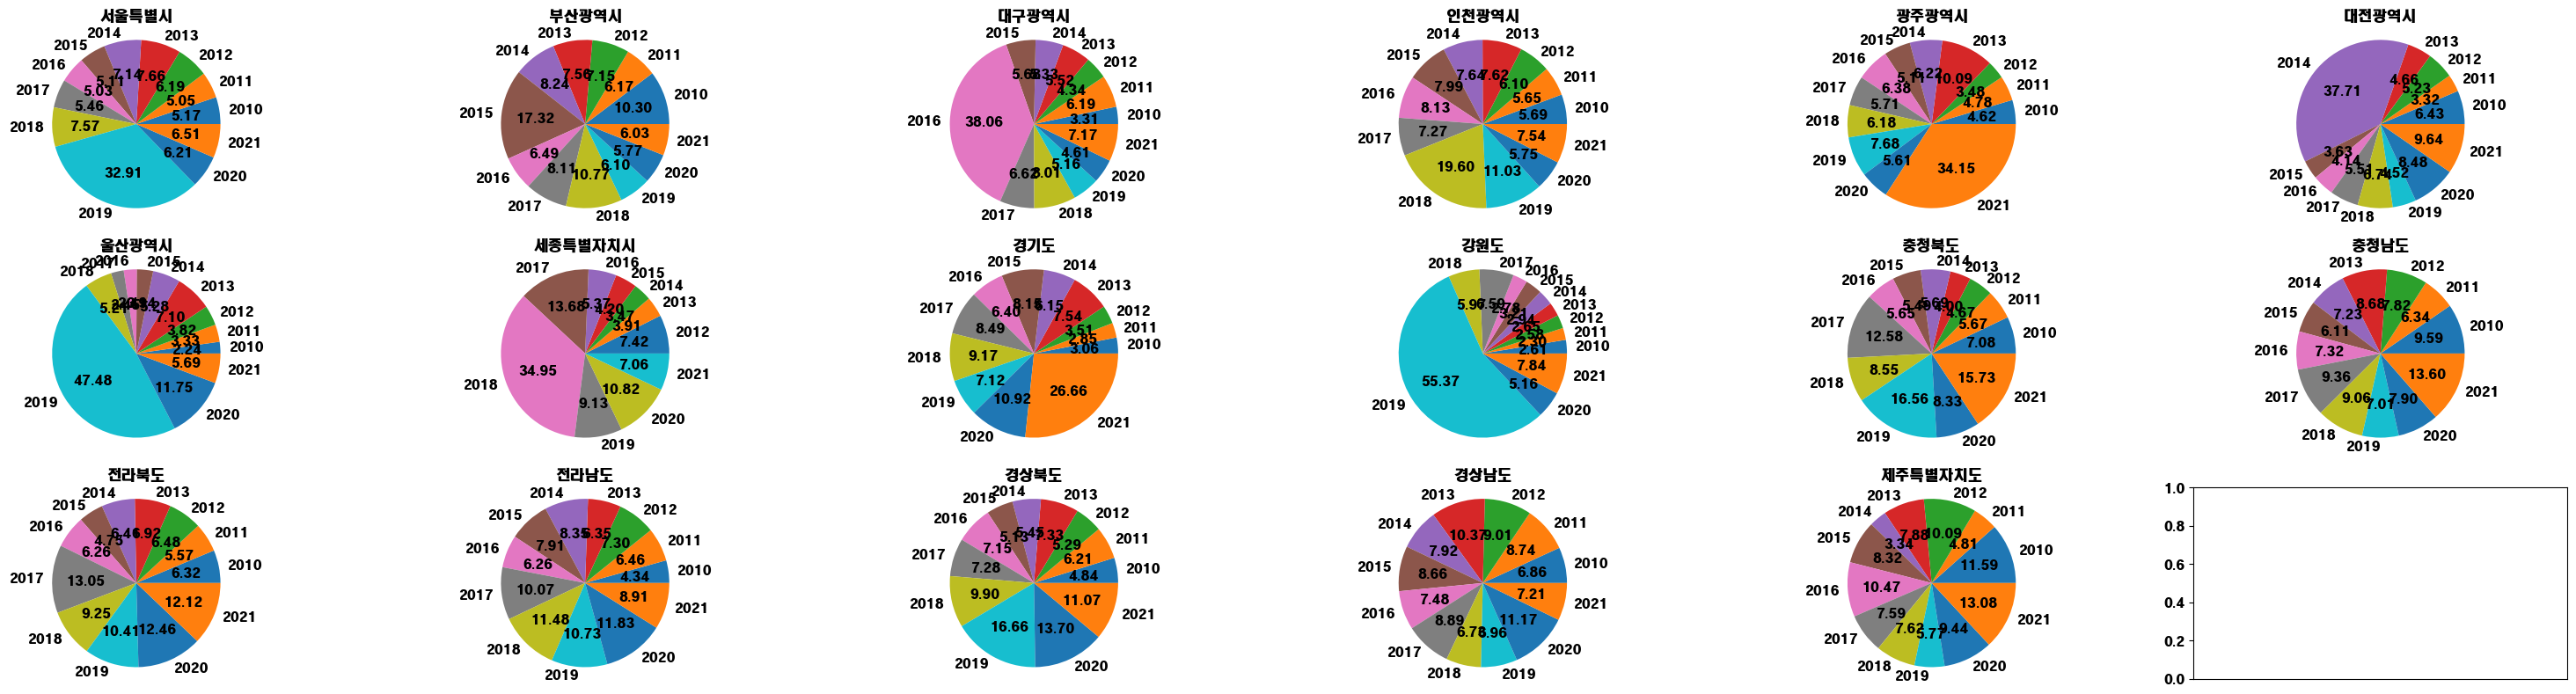

In [6]:
fig, axes = plt.subplots(3,6, figsize=(6.4*6,4.8*2), sharey=False, sharex=True)
col_name = df2.columns
for i, e in enumerate(df2['행정구역별'].unique()):
    filter1 = df2['행정구역별'] == e
    ax = axes[i//6, i%6]
    xs = df2.loc[filter1,'재산피해(계) (천원)']
    ys = df2.loc[filter1,col_name]
#     ax.plot(xs.astype('str'),ys.iloc[:,0] , 'go--')
#     ax2 = ax.twinx()
    ax.set_title(e)
    ax.pie(xs, labels=ys.iloc[:,1],radius=1.1,autopct='%.2f')
    
# ax.legend(ys.iloc[:,0], loc=0)


### heatmap

* 행정구역별(전국제외) vs. 시점
* 사망명수

C:\Users\ITPS\AppData\Local\Temp\ipykernel_5900\1485338275.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = fire_accident_data_f.pivot("행정구역별","시점","사망 (명)")


<AxesSubplot: xlabel='시점', ylabel='행정구역별'>

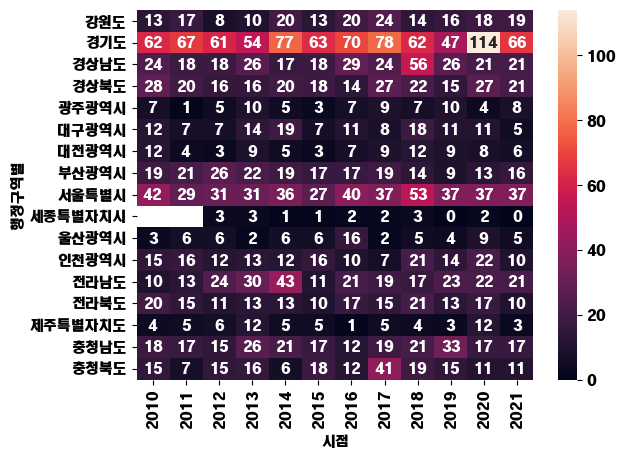

In [7]:
df1 = fire_accident_data_f.pivot("행정구역별","시점","사망 (명)")

df1
sns.heatmap(df1, annot=True, fmt='.0f')

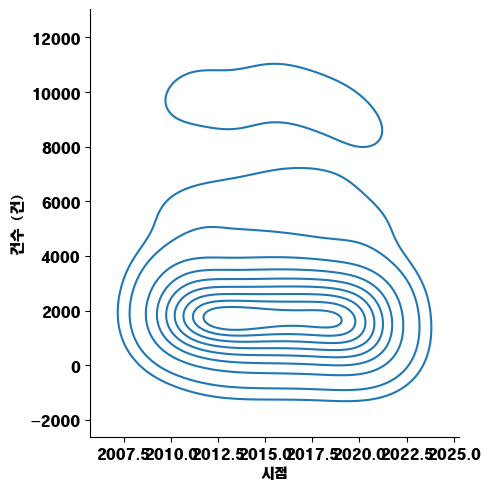

In [8]:
# sns.displot(data=fire_accident_data_f,x='시점')
# sns.displot(data=fire_accident_data_f,x='건수 (건)')
sns.displot(data=fire_accident_data_f,x='시점', y='건수 (건)', kind='kde')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_5900\1959429976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_accident_data_f['시점'] = fire_accident_data_f['시점'].astype(np.int64)


(-0.5, 11.5)


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 202 and the vector passed to `x` has length 12.

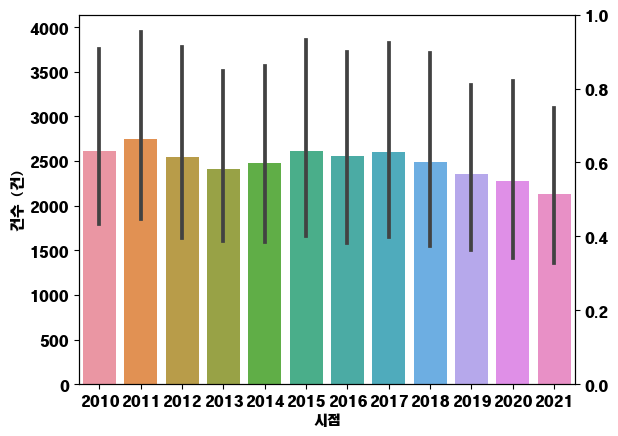

In [22]:
fire_accident_data_f['시점'] = fire_accident_data_f['시점'].astype(np.int64)

ax1 = sns.barplot(data=fire_accident_data_f, x='시점', y='건수 (건)')
print(ax1.get_xlim())

ax2 =ax1.twinx()
# ax2.set_xlim(ax1.get_xlim())
sns.lineplot(data=fire_accident_data_f, x=np.linspace(0,11,12), y='사망 (명)', ax=ax2)
# sns.lineplot(data=fire_accident_data_f, x=np.arange(12), y='사망 (명)', ax=ax2)
# sns.lineplot(data=fire_accident_data_f, x='시점',y ='사망 (명)', ax=ax2)
# print(ax2.get_xlim())

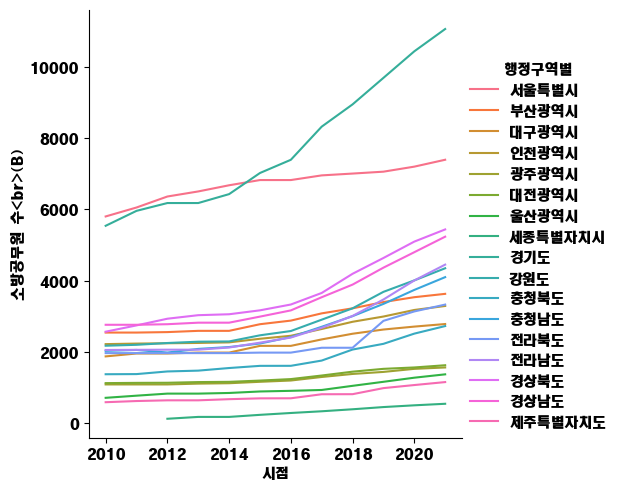

In [243]:
# sns.catplot(x='시점', y='건수 (건)', data=result, kind='bar', col='행정구역별', col_wrap=3)
# sns.relplot(data = df1, x='시점', y='건수 (건)', kind ='line', hue='행정구역별')
sns.relplot(data = df2, x='시점', y='소방공무원 수<br>(B)', kind ='line', hue='행정구역별')
# sns.catplot(data = df1, x='시점', y='사망 (명)' , kind='bar', col='행정구역별', col_wrap=3)

In [237]:
# sns.kdeplot(data = df1, x='시점', y='건수 (건)', kind ='kde', hue='행정구역별')
# sns.kdeplot(data=df1, x="시점",hue="사건 (건)")

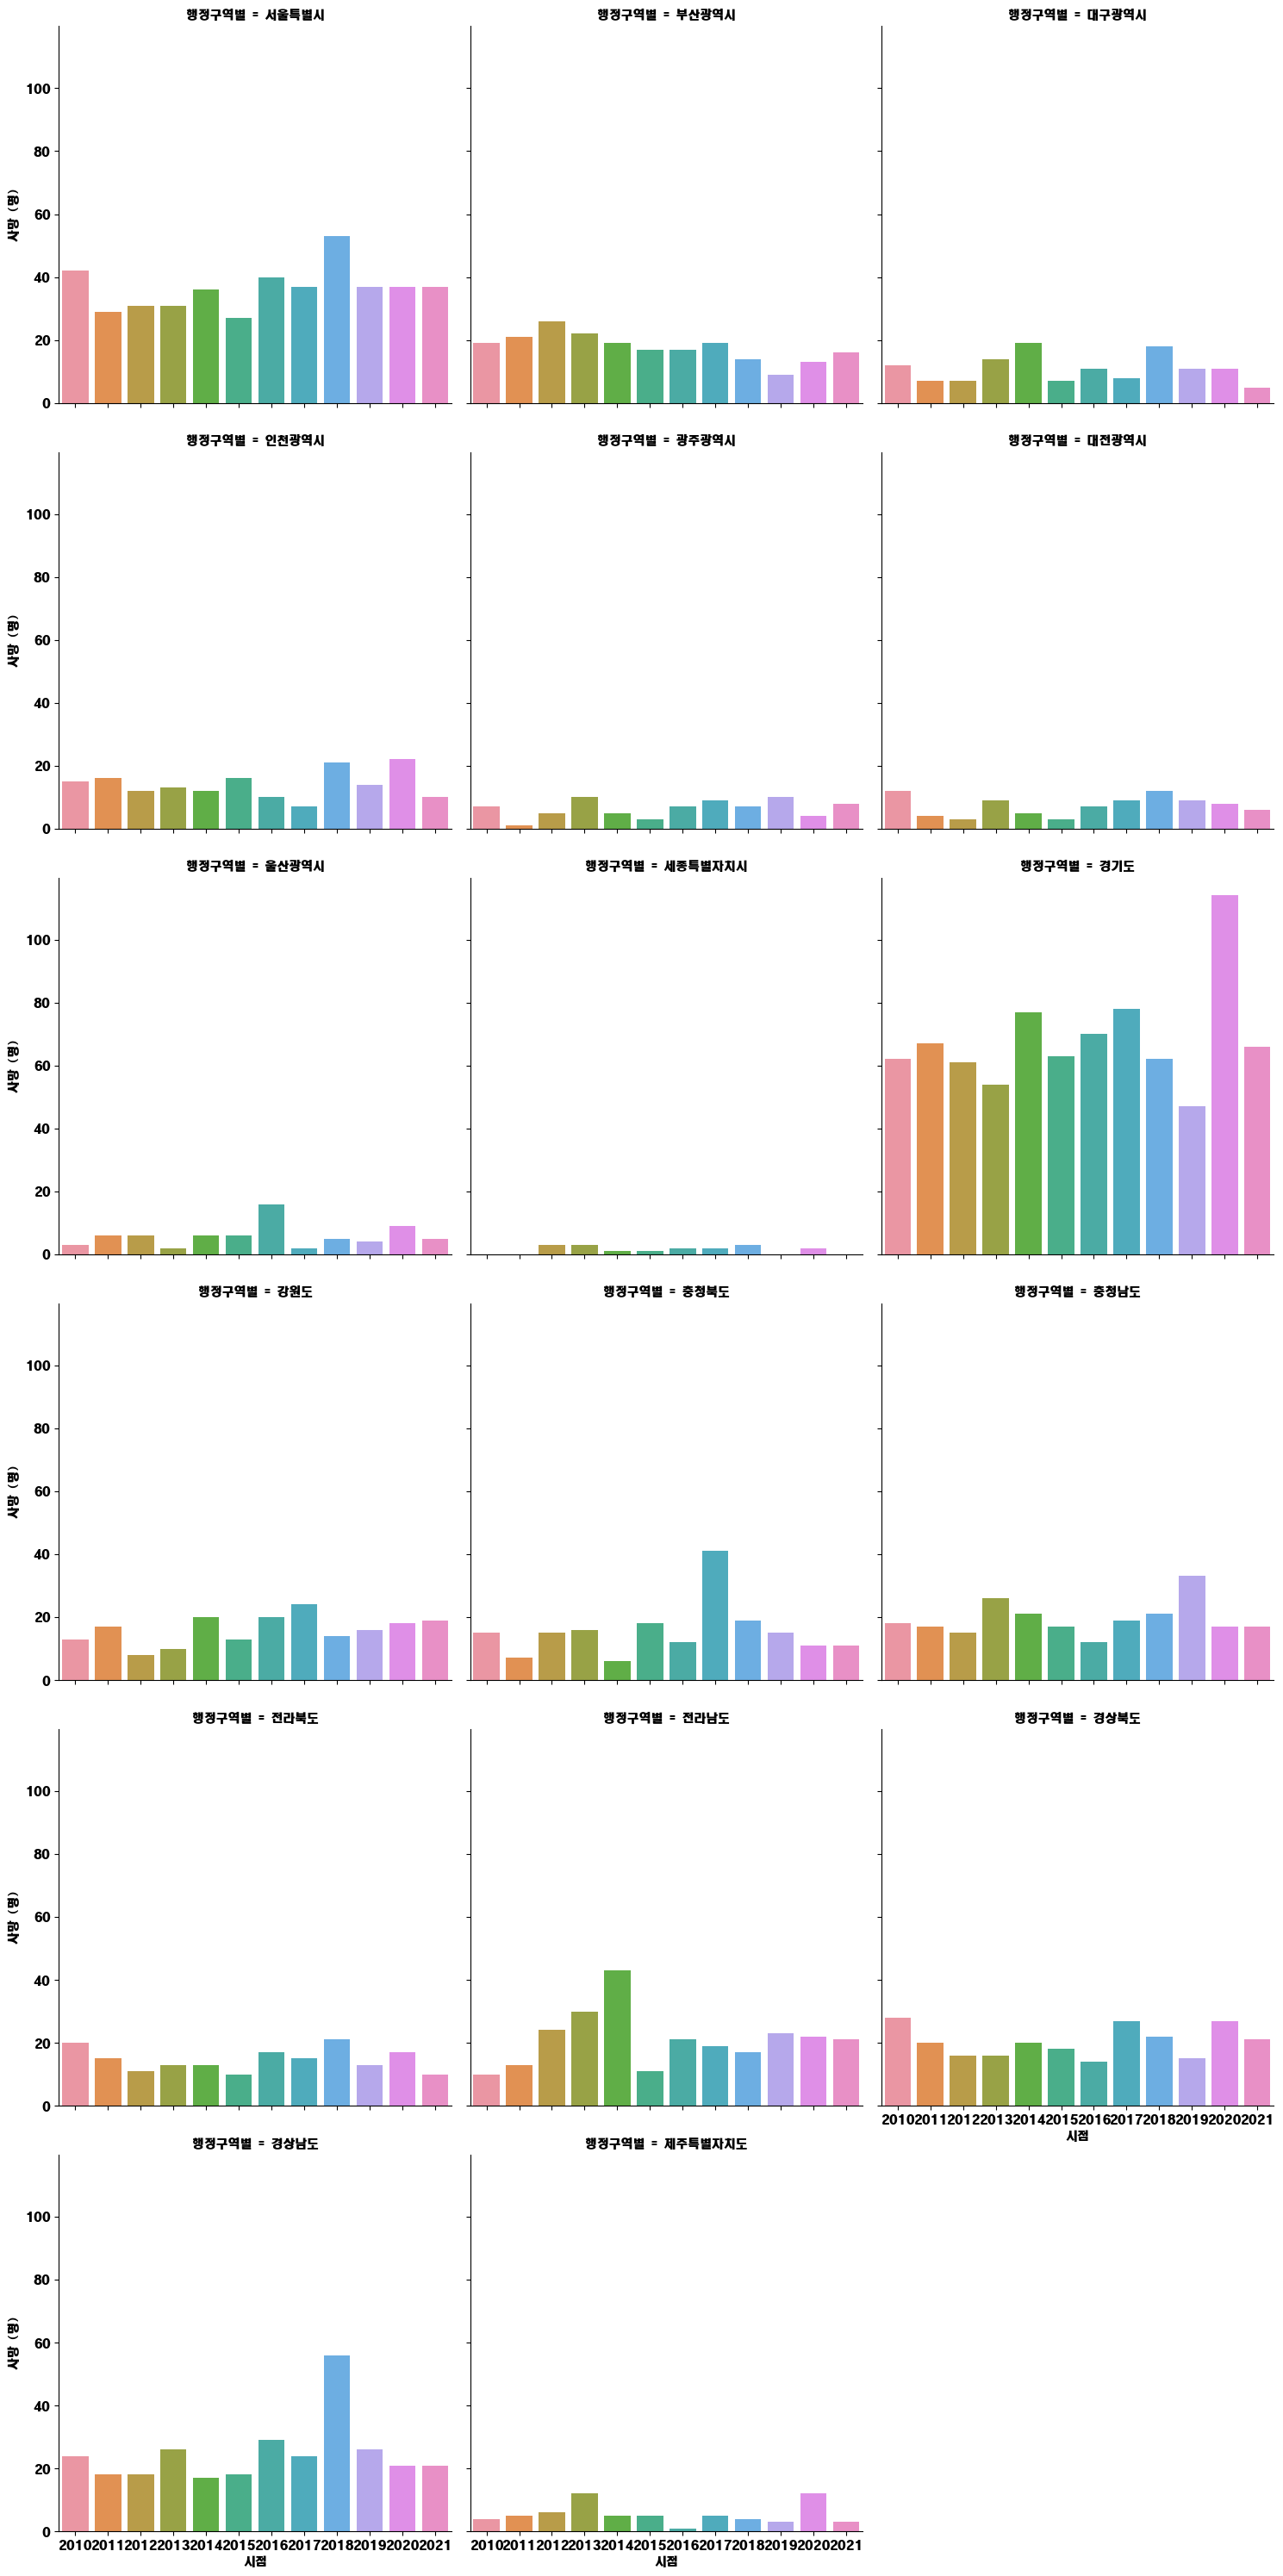

In [245]:
sns.catplot(data = df2, x='시점', y='사망 (명)', kind ='bar', col='행정구역별', col_wrap=3)